<a href="https://colab.research.google.com/github/ankush2805/EIP/blob/master/NMist_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


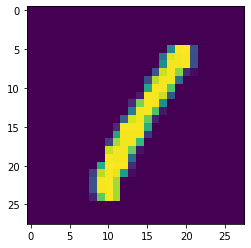

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3])

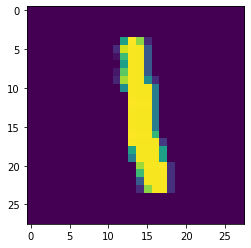

In [6]:
plt.imshow(X_train[6])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [114]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [115]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 1, 1, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [117]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1140 - acc: 0.9652
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0379 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0273 - acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0204 - acc: 0.9937
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0158 - acc: 0.9951
Epoch 6/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0132 - acc: 0.9958
Epoch 7/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0115 - acc: 0.9963
Epoch 8/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0087 - acc: 0.9971
Epoch 9/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0083 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 10s 163us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [108]:
print(score)

[0.02676203621702298, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [85]:
print(y_pred[:9])
print(y_test[:9])

[[2.06597265e-15 7.70809215e-15 2.99583329e-13 9.59149947e-12
  1.02715947e-17 5.31523101e-18 1.91010804e-22 1.00000000e+00
  8.73334114e-16 1.07505220e-10]
 [4.03809119e-09 8.11171182e-12 1.00000000e+00 4.70855127e-17
  9.84500635e-15 1.78898517e-25 1.62960409e-10 4.40977925e-17
  3.33702792e-14 4.05821955e-17]
 [1.86857279e-12 9.99999881e-01 1.37172175e-11 5.02345019e-14
  2.56538293e-08 4.52467716e-11 7.04164158e-11 1.00967107e-07
  2.40501091e-10 5.90457891e-11]
 [9.99999881e-01 1.17791750e-18 1.52208270e-12 5.66110201e-13
  6.46600828e-13 1.09124352e-12 9.76563115e-08 7.53412248e-17
  2.29763552e-11 2.54856687e-08]
 [3.76984549e-15 4.60350670e-13 7.60458472e-15 3.71582965e-17
  1.00000000e+00 7.43312307e-17 1.44516465e-11 2.21539059e-16
  1.86817228e-10 5.50924852e-08]
 [1.36507873e-12 1.00000000e+00 2.34229454e-12 4.08936257e-17
  1.58573172e-08 3.44074048e-16 1.07317143e-14 6.48066578e-09
  1.71465741e-11 6.95283458e-12]
 [5.67885829e-25 2.57866618e-13 1.66014256e-17 1.18079179e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

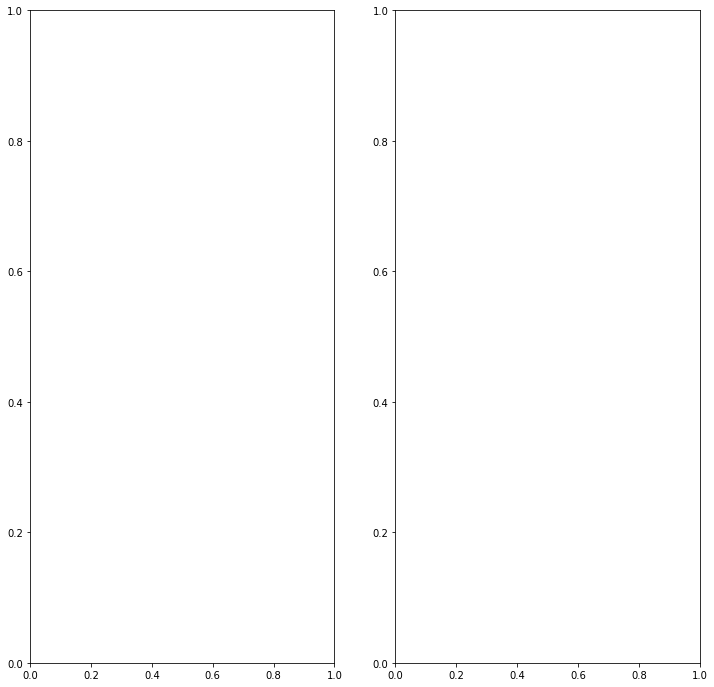

In [88]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_114'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()